In [1]:
ED_DATA_DIR = r"../data/transverse_cluster_14_site_ed"

In [2]:
import h5py
from tenpy.tools import hdf5_io

import os

In [3]:
import sys

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tenpy.linalg.np_conserved as npc

In [6]:
sys.path.append('../')

In [7]:
from SPTOptimization.utils import to_npc_array

# Load data

In [8]:
def split_full_state_legs(full_state_psi):
    dim = full_state_psi.shape

    num_legs = int(np.log2(dim[0]))
    new_labels = [f'p{i}' for i in range(num_legs)]

    full_state_psi.iset_leg_labels(['(' + '.'.join(new_labels) + ')'])
    full_state_psi = full_state_psi.split_legs([0])
    return full_state_psi

In [9]:
loaded_data = list()

for local_file_name in os.listdir(ED_DATA_DIR):
    f_name = r"{}/{}".format(ED_DATA_DIR, local_file_name, ignore_unknown=False)
    with h5py.File(f_name, 'r') as f:
        data = hdf5_io.load_from_hdf5(f)
        loaded_data.append(data)

In [10]:
b_parameters = sorted(list(d['paramters']['B'] for d in loaded_data))

In [11]:
psi_dict = dict()

In [12]:
for b in b_parameters:
    psi = next(
        d['wavefunction']
        for d in loaded_data
        if d['paramters']['B'] == b
    )
    psi = split_full_state_legs(psi)
    
    rounded_b = round(b, 1)
    psi_dict[rounded_b] = psi

In [13]:
energies = [t['energy'] for t in loaded_data]

# Energies

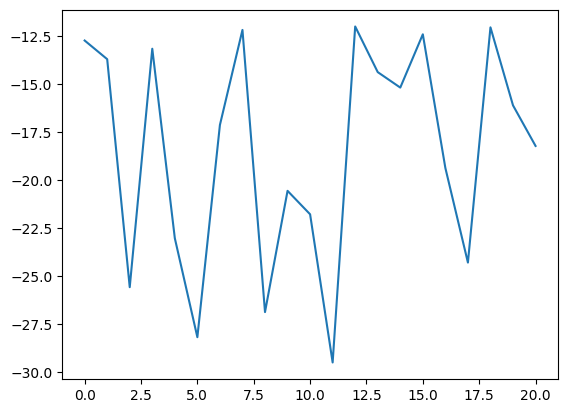

In [14]:
plt.plot(energies)

Looks noisy...

# Mean Z

In [15]:
np_I = np.array([[1,0],[0,1]])
np_X = np.array([[0,1],[1,0]])
np_Y = np.array([[0,-1j],[1j,0]])
np_Z = np.array([[1,0],[0,-1]])

npc_I = to_npc_array(np_I)
npc_X = to_npc_array(np_X)
npc_Y = to_npc_array(np_Y)
npc_Z = to_npc_array(np_Z)

In [16]:
npc_Z

<npc.Array shape=(2, 2) labels=['p', 'p*']>

In [17]:
def get_mean(psi, site_index, op):
    # calculate rdm

    t = npc.tensordot(psi, op, [[f'p{site_index}',], ['p*']])
    t.ireplace_label('p', f'p{site_index}')
    leg_labels = psi.get_leg_labels()
    leg_labels_conj = psi.conj().get_leg_labels()

    out = npc.tensordot(t, psi.conj(), [leg_labels, leg_labels_conj])

    return out

In [18]:
get_mean(psi_dict[1.2], 7, npc_X)

(0.8017529899661983+0j)

In [19]:
mean_xs = np.array([
    [get_mean(psi, i, npc_X) for i in range(14)]
    for psi in psi_dict.values()
])

/home/kieranc/Desktop/numerical_spt_classification/code/num_spt_venv_p11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kieranc/Desktop/numerical_spt_classification/code/num_spt_venv_p11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


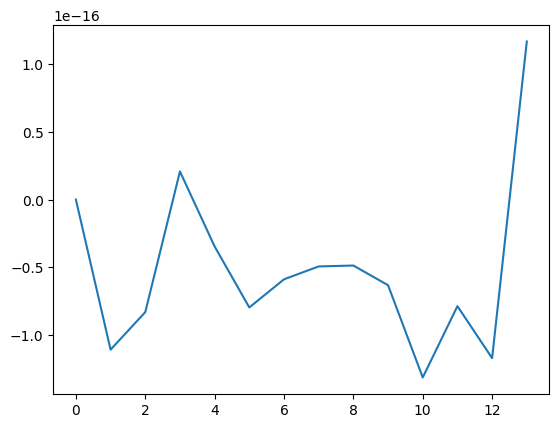

In [20]:
plt.plot(mean_xs[0])

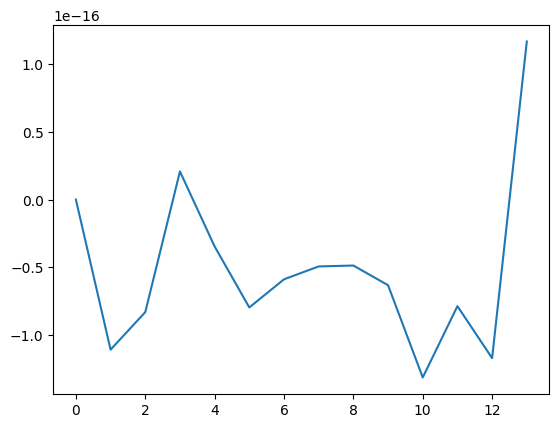

In [21]:
plt.plot(mean_xs[0])

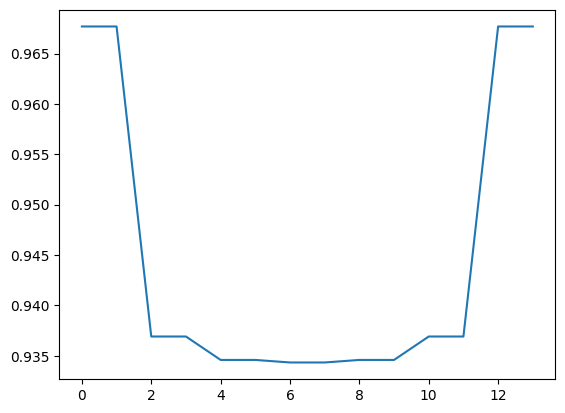

In [22]:
plt.plot(mean_xs[-1])

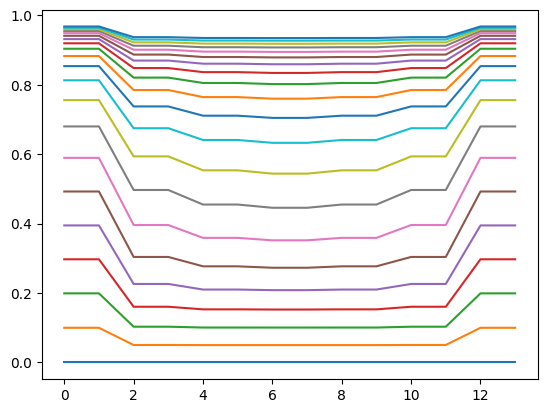

In [23]:
for l in mean_xs:
    plt.plot(l)

In [24]:
def get_two_point_mean(psi, site_index_1, site_index_2, op):
    # calculate rdm

    t = npc.tensordot(psi, op, [[f'p{site_index_1}',], ['p*']])
    t.ireplace_label('p', f'p{site_index_1}')

    t = npc.tensordot(t, op, [[f'p{site_index_2}',], ['p*']])
    t.ireplace_label('p', f'p{site_index_2}')

    leg_labels = psi.get_leg_labels()
    leg_labels_conj = psi.conj().get_leg_labels()

    out = npc.tensordot(t, psi.conj(), [leg_labels, leg_labels_conj])

    return out

In [25]:
two_point_xs = np.array([
    [
        [get_two_point_mean(psi, i, j, npc_X) for j in range(14)]
        for i in range(14)
    ]
    for psi in psi_dict.values()
])

In [26]:
two_point_xs.shape

(21, 14, 14)

In [27]:
mean_xs.shape

(21, 14)

In [28]:
X = mean_xs[..., np.newaxis]*mean_xs[:,np.newaxis,:]

In [29]:
X.shape

(21, 14, 14)

In [30]:
x_correlations = (
    two_point_xs
    - mean_xs[..., np.newaxis]*mean_xs[:,np.newaxis,:]
)

In [31]:
x_correlations.shape

(21, 14, 14)

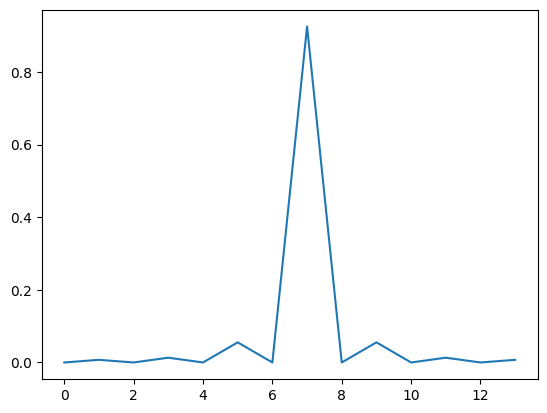

In [32]:
plt.plot(x_correlations[5,7])

In [33]:
x_correlations[5,7]

array([-2.77555756e-17+0.j,  7.32382341e-03+0.j, -5.55111512e-17+0.j,
        1.31674258e-02+0.j, -6.93889390e-17+0.j,  5.54458542e-02+0.j,
        1.38777878e-17+0.j,  9.25562219e-01+0.j,  2.77555756e-17+0.j,
        5.54458542e-02+0.j, -6.93889390e-17+0.j,  1.31674258e-02+0.j,
       -2.77555756e-17+0.j,  7.32382341e-03+0.j])

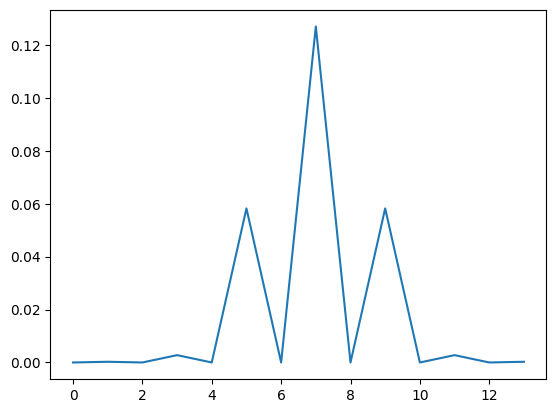

In [34]:
plt.plot(x_correlations[20,7])

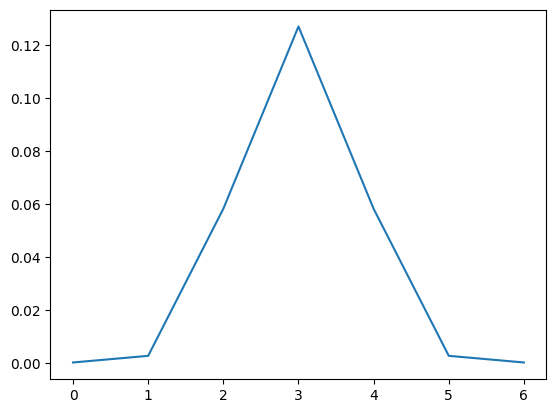

In [35]:
plt.plot(x_correlations[20,7,1::2])

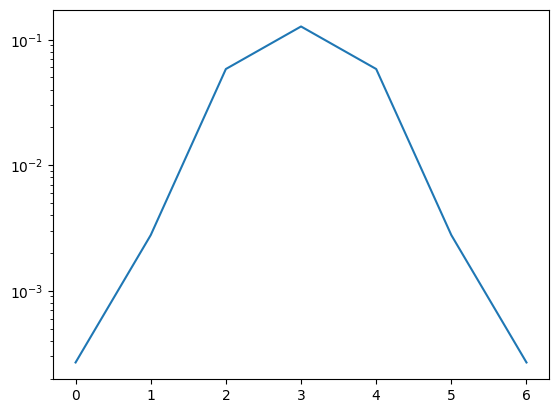

In [36]:
plt.plot(x_correlations[20,7,1::2])
plt.yscale('log')

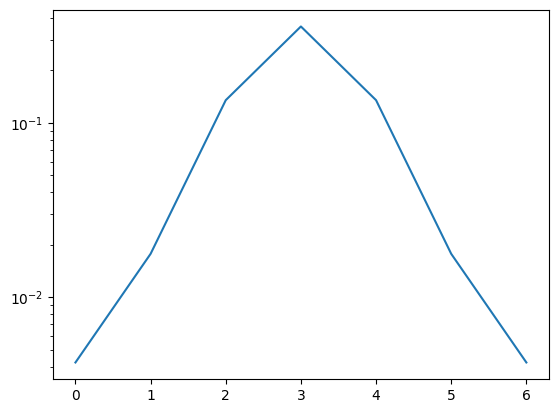

In [44]:
plt.plot(x_correlations[12,7,1::2])
plt.yscale('log')

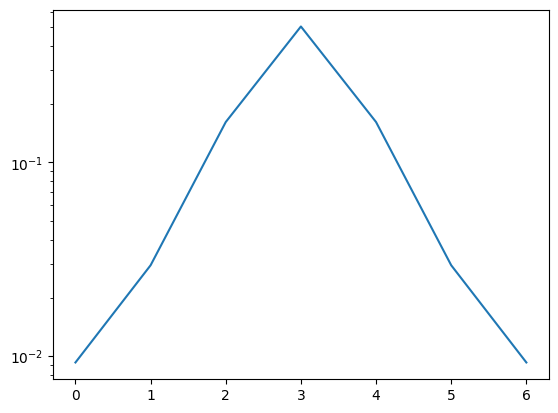

In [48]:
plt.plot(x_correlations[10,7,1::2])
plt.yscale('log')

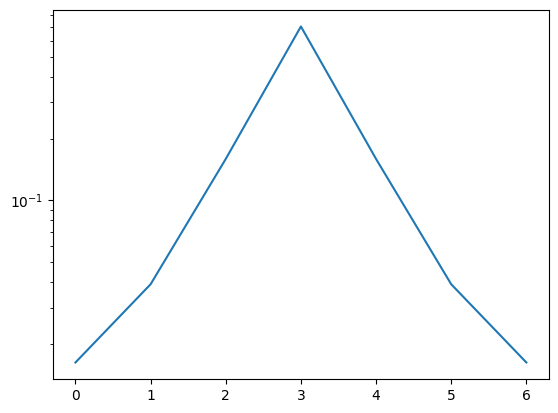

In [45]:
plt.plot(x_correlations[8,7,1::2])
plt.yscale('log')

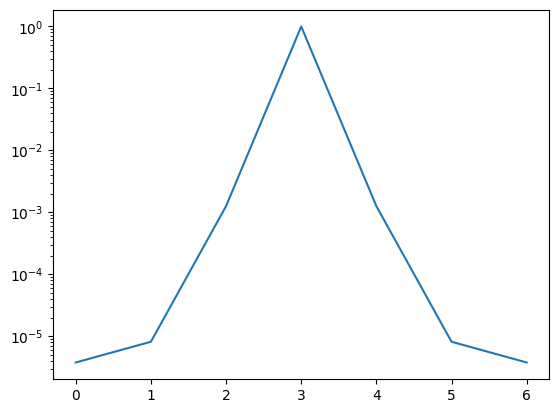

In [47]:
plt.plot(x_correlations[1,7,1::2])
plt.yscale('log')

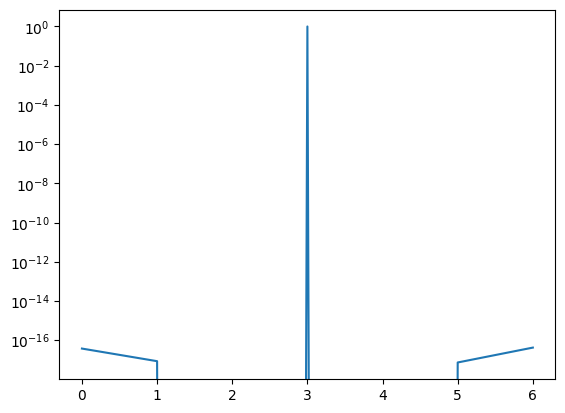

In [46]:
plt.plot(x_correlations[0,7,1::2])
plt.yscale('log')

Not correlated? Very short range correlation?

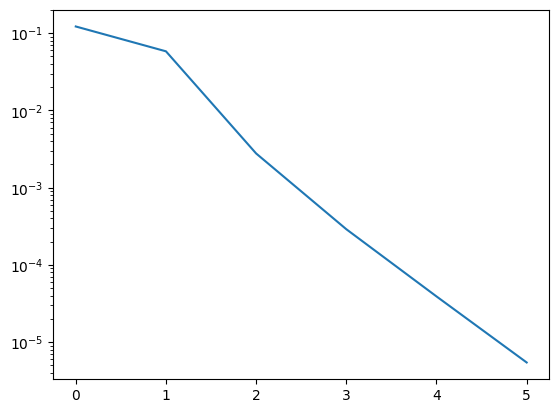

In [60]:
plt.plot(x_correlations[20,3,3::2])
plt.yscale('log')

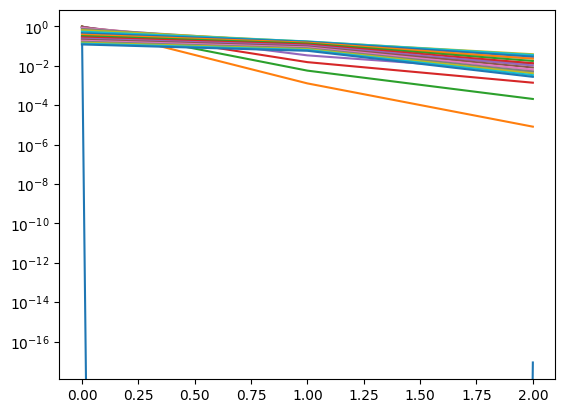

In [63]:
for i in range(21):
    plt.plot(x_correlations[i,3,3:9:2])
plt.yscale('log')

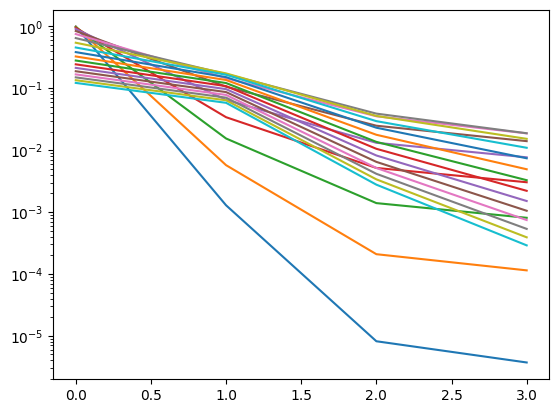

In [65]:
for i in range(1,21):
    plt.plot(x_correlations[i,3,3:10:2])
plt.yscale('log')

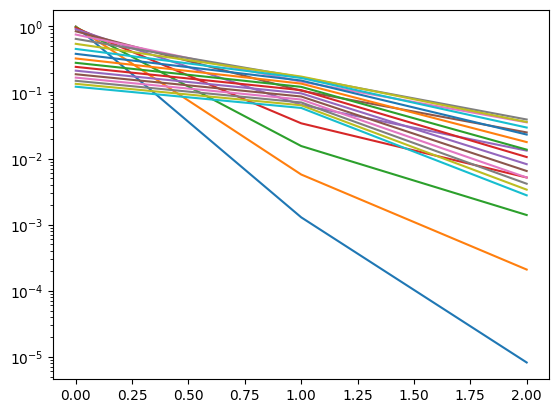

In [67]:
for i in range(1,21):
    plt.plot(x_correlations[i,3,3:9:2])
plt.yscale('log')

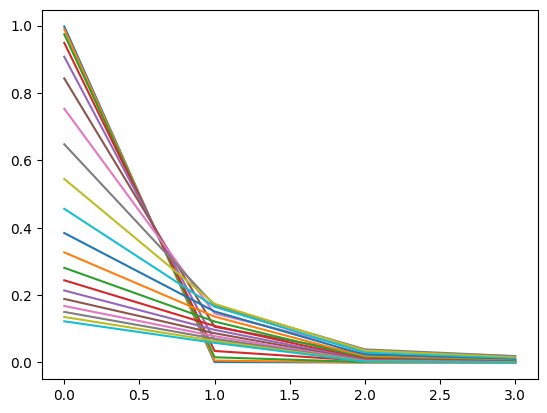

In [66]:
for i in range(1,21):
    plt.plot(x_correlations[i,3,3:10:2])

In [71]:
z_corr_lengths = 4/np.log(x_correlations[:,3,5]/x_correlations[:,3,9])

In [72]:
z_corr_lengths

array([0.84576825+0.j, 0.68394487+0.j, 1.02192923+0.j, 1.35583516+0.j,
       1.65297518+0.j, 1.87148786+0.j, 1.97527052+0.j, 1.94820599+0.j,
       1.81764145+0.j, 1.64289941+0.j, 1.47198825+0.j, 1.32498399+0.j,
       1.20441754+0.j, 1.10657642+0.j, 1.02675585+0.j, 0.96088994+0.j,
       0.90581976+0.j, 0.85917252+0.j, 0.81917717+0.j, 0.78450466+0.j,
       0.75414728+0.j])

In [75]:
z_corr_lengths[0] = 0

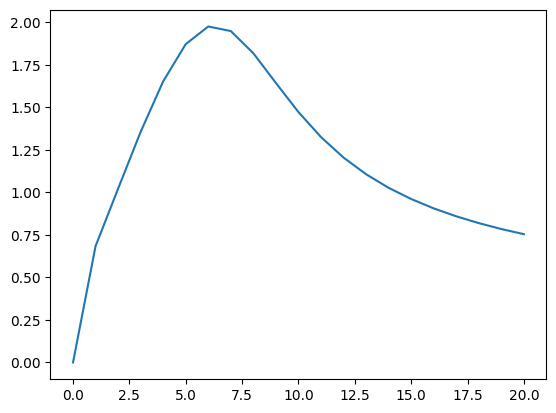

In [76]:
plt.plot(z_corr_lengths)

Quite wrong!

# Schmidt values

In [37]:
def get_rdm_schmidt_values(psi, site_index_1, site_index_2):
    if site_index_1 == site_index_2:
        return np.array([np.nan,]*4)
    
    leg_labels = psi.get_leg_labels()
    leg_labels_to_contract = [
        l for l in leg_labels
        if l not in [f'p{site_index_1}', f'p{site_index_2}']
    ]

    leg_labels_conj = psi.conj().get_leg_labels()
    leg_labels_conj_to_contract = [
        l for l in leg_labels_conj
        if l not in [f'p{site_index_1}*', f'p{site_index_2}*']
    ]

    rdm = npc.tensordot(
        psi,
        psi.conj(),
        [leg_labels_to_contract, leg_labels_conj_to_contract]
    )

    rdm_grouped = rdm.combine_legs([
        [f'p{site_index_1}', f'p{site_index_1}*'],
        [f'p{site_index_2}', f'p{site_index_2}*']
    ])

    S = npc.svd(rdm_grouped, compute_uv=False)

    return S

In [38]:
schmidt_values = np.array([
    [
        [get_rdm_schmidt_values(psi, i, j) for j in range(14)]
        for i in range(14)
    ]
    for psi in psi_dict.values()
])

In [39]:
schmidt_values.shape

(21, 14, 14, 4)

In [40]:
schmidt_values[5,5,:,0]

array([0.57830826, 0.57930156, 0.54225329, 0.5449228 , 0.538347  ,
              nan, 0.53778265, 0.53982782, 0.538347  , 0.53879766,
       0.54225329, 0.54255278, 0.57830826, 0.57861378])

In [41]:
schmidt_values[5,5,:,1]

array([5.60228167e-15, 6.19600188e-02, 9.13658119e-15, 1.26517899e-01,
       1.98526553e-14,            nan, 2.19999172e-14, 1.26168695e-01,
       5.33933602e-15, 5.99543279e-02, 3.56058115e-15, 5.03026302e-02,
       2.99059501e-15, 7.27713588e-02])

In [42]:
schmidt_values[5,5,:,2]

array([4.85722573e-17, 7.16643427e-03, 1.66726404e-15, 2.98179919e-02,
       1.04312701e-14,            nan, 1.18157136e-14, 2.56775644e-02,
       4.57075847e-15, 5.80786913e-03, 1.64478677e-15, 3.53295229e-03,
       3.67514165e-16, 2.22915830e-03])

In [43]:
schmidt_values[5,5,:,3]

array([2.57929919e-17, 1.26349769e-03, 8.67361738e-17, 9.84969404e-03,
       5.51642065e-16,            nan, 8.95117314e-16, 8.17807140e-03,
       1.11022302e-16, 7.83315689e-04, 3.46944695e-18, 4.32780307e-04,
       6.93889390e-18, 5.23269492e-04])

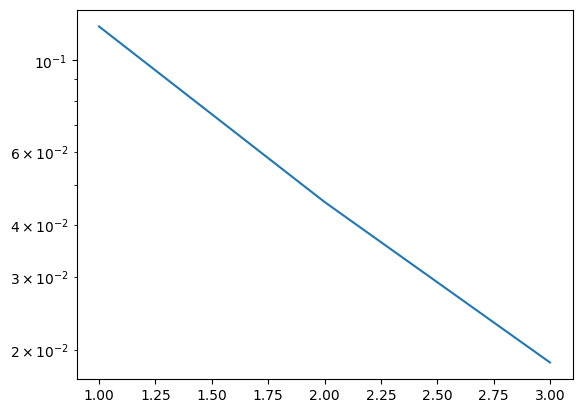

In [52]:
plt.plot(schmidt_values[20,7,7::2,1])
plt.yscale('log')

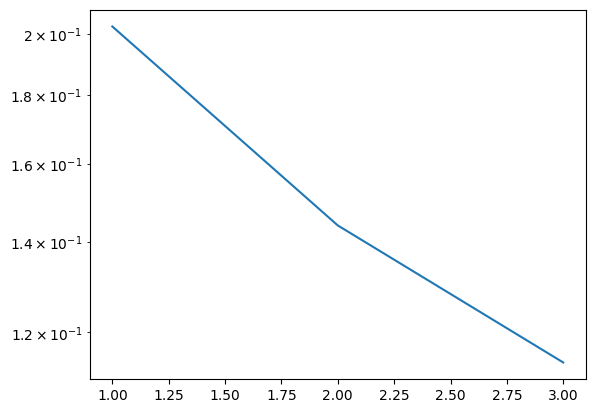

In [54]:
plt.plot(schmidt_values[10,7,7::2,1])
plt.yscale('log')

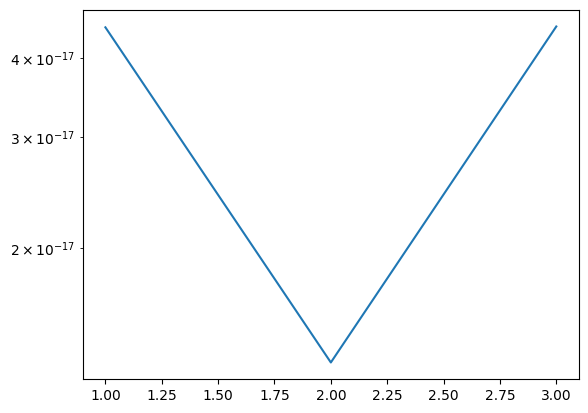

In [55]:
plt.plot(schmidt_values[0,7,7::2,1])
plt.yscale('log')

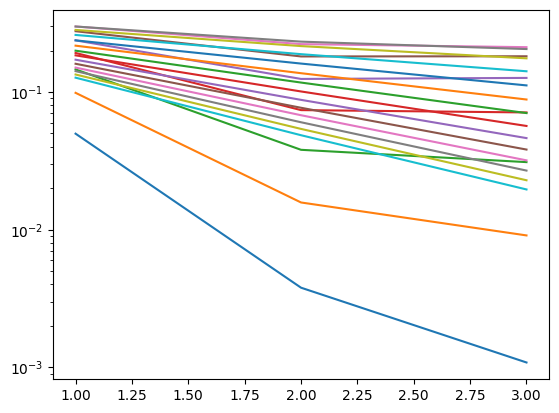

In [57]:
for i in range(1,21):
    plt.plot(schmidt_values[i,7,7::2,1]/schmidt_values[i,7,7::2,0])
plt.yscale('log')

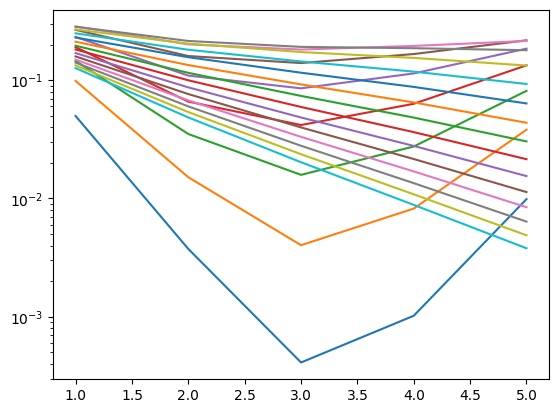

In [77]:
for i in range(1,21):
    plt.plot(schmidt_values[i,3,3::2,1]/schmidt_values[i,3,3::2,0])
plt.yscale('log')

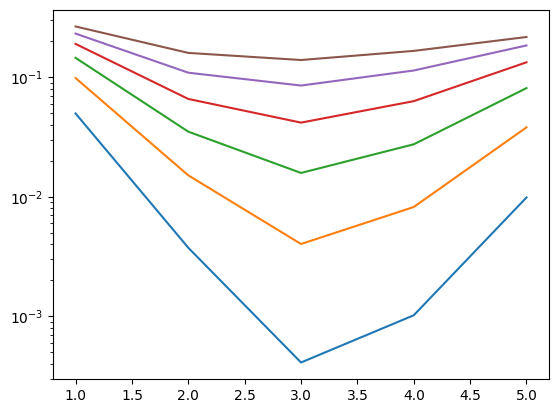

In [81]:
for i in range(1,7):
    plt.plot(schmidt_values[i,3,3::2,1]/schmidt_values[i,3,3::2,0])
plt.yscale('log')

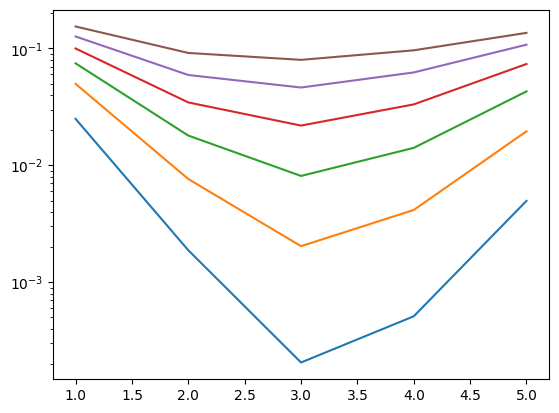

In [82]:
for i in range(1,7):
    plt.plot(schmidt_values[i,3,3::2,1])
plt.yscale('log')

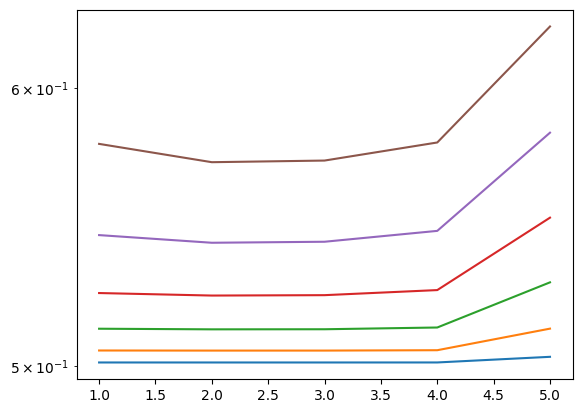

In [83]:
for i in range(1,7):
    plt.plot(schmidt_values[i,3,3::2,0])
plt.yscale('log')

In [88]:
np.sum(schmidt_values, axis=-1)

array([[[       nan, 0.70710678, 0.70710678, ..., 0.70710678,
         0.70710678, 1.        ],
        [0.70710678,        nan, 1.        , ..., 0.5       ,
         0.5       , 0.70710678],
        [0.70710678, 1.        ,        nan, ..., 0.5       ,
         0.5       , 0.70710678],
        ...,
        [0.70710678, 0.5       , 0.5       , ...,        nan,
         1.        , 0.70710678],
        [0.70710678, 0.5       , 0.5       , ..., 1.        ,
                nan, 0.70710678],
        [1.        , 0.70710678, 0.70710678, ..., 0.70710678,
         0.70710678,        nan]],

       [[       nan, 0.50498759, 0.55548077, ..., 0.50312477,
         0.55442742, 0.5049876 ],
        [0.50498759,        nan, 0.50312477, ..., 0.50808352,
         0.50498759, 0.55442742],
        [0.55548077, 0.50312477,        nan, ..., 0.50126881,
         0.50808352, 0.50312477],
        ...,
        [0.50312477, 0.50808352, 0.50126881, ...,        nan,
         0.50312477, 0.55548077],
        [0.5

In [87]:
np.sum(schmidt_values**2, axis=-1)

array([[[       nan, 0.5       , 0.5       , ..., 0.5       ,
         0.5       , 1.        ],
        [0.5       ,        nan, 0.5       , ..., 0.25      ,
         0.25      , 0.5       ],
        [0.5       , 0.5       ,        nan, ..., 0.25      ,
         0.25      , 0.5       ],
        ...,
        [0.5       , 0.25      , 0.25      , ...,        nan,
         0.5       , 0.5       ],
        [0.5       , 0.25      , 0.25      , ..., 0.5       ,
                nan, 0.5       ],
        [1.        , 0.5       , 0.5       , ..., 0.5       ,
         0.5       ,        nan]],

       [[       nan, 0.25501247, 0.25561602, ..., 0.25313453,
         0.25745665, 0.25501247],
        [0.25501247,        nan, 0.25313453, ..., 0.25315911,
         0.25501247, 0.25745665],
        [0.25561602, 0.25313453,        nan, ..., 0.25127042,
         0.25315911, 0.25313453],
        ...,
        [0.25313453, 0.25315911, 0.25127042, ...,        nan,
         0.25313453, 0.25561602],
        [0.2